## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.
> If it's exactly in between two options, select the higher value.


### Dataset

In this homework, we continue using the fuel efficiency dataset.
Download it from <a href='https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'>here</a>.

You can do it with wget:

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
```

The goal of this homework is to create a regression model for predicting the car fuel efficiency (column `'fuel_efficiency_mpg'`).





In [2]:
#!pip install jupyter

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.ensemble import RandomForestRegressor

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv")
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


### Preparing the dataset 

Preparation:

* Fill missing values with zeros.
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1.
* Use `DictVectorizer(sparse=True)` to turn the dataframes into matrices.

In [5]:
df.isna().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [6]:
df = df.fillna(0)
df.isna().sum()

engine_displacement    0
num_cylinders          0
horsepower             0
vehicle_weight         0
acceleration           0
model_year             0
origin                 0
fuel_type              0
drivetrain             0
num_doors              0
fuel_efficiency_mpg    0
dtype: int64

In [7]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

df_full_train.shape, df_val.shape, df_test.shape

((7763, 11), (1941, 10), (1941, 10))

In [8]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [31]:
feature_names = dv.get_feature_names_out()

In [9]:
X_val

array([[2.09000000e+01, 0.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 2.25575032e+03],
       [1.54000000e+01, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 2.92132827e+03],
       [1.38000000e+01, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.35778751e+03],
       ...,
       [2.11000000e+01, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 3.06894128e+03],
       [1.75000000e+01, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.25600386e+03],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.92306748e+03]], shape=(1941, 14))

## Question 1

Let's train a decision tree regressor to predict the `fuel_efficiency_mpg` variable. 

* Train a model with `max_depth=1`.


Which feature is used for splitting the data?


* `'vehicle_weight'`
* `'model_year'`
* `'origin'`
* `'fuel_type'`




In [10]:
tree_regressor = DecisionTreeRegressor(max_depth=1, random_state=42)

tree_regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=1, random_state=42)

In [47]:
et = export_text(tree_regressor, feature_names=feature_names)
print(et)

|--- vehicle_weight <= 3022.11
|   |--- value: [16.88]
|--- vehicle_weight >  3022.11
|   |--- value: [12.94]



## Question 2

Train a random forest regressor with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1` (optional - to make training faster)


What's the RMSE of this model on the validation data?

* 0.045
* 0.45
* 4.5
* 45.0




In [11]:
rfr = RandomForestRegressor(n_estimators = 10,
                            random_state = 1,
                            n_jobs = -1)
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_val)

score = rmse(y_val,y_pred)
print(round(score,2))

0.46


## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.


After which value of `n_estimators` does RMSE stop improving?
Consider 3 decimal places for calculating the answer.

- 10
- 25
- 80
- 200

If it doesn't stop improving, use the latest iteration number in
your answer.


In [12]:
estimators = np.arange(10,200,10)
#print(estimators)
scores = []
for e in estimators:
    rfr = RandomForestRegressor(n_estimators = e,
                            random_state = 1,
                            n_jobs = -1)
    rfr.fit(X_train,y_train)
    y_pred = rfr.predict(X_val)
    score = round(rmse(y_val,y_pred),3)
    scores.append(score)

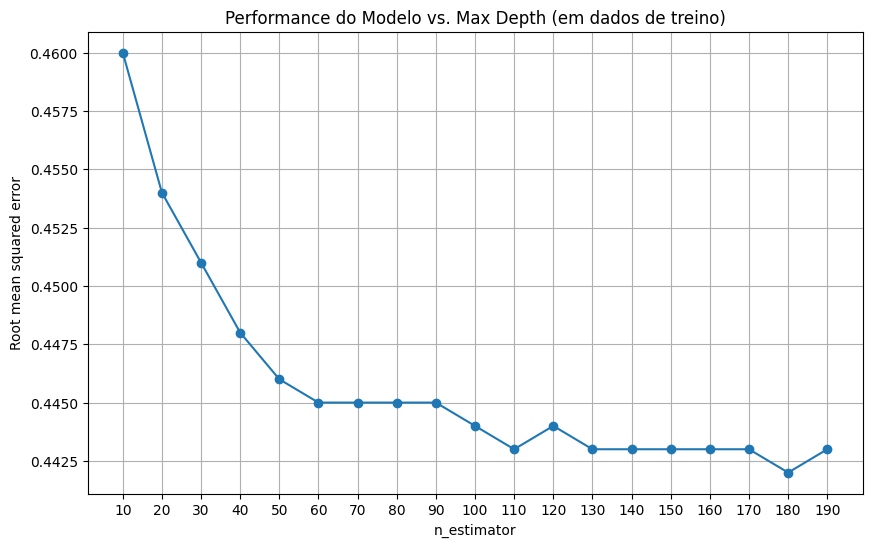

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(estimators, scores, marker='o', linestyle='-')
plt.title('Performance do Modelo vs. Max Depth (em dados de treino)')
plt.xlabel('n_estimator')
plt.ylabel('Root mean squared error')
plt.xticks(estimators)
plt.grid(True)

plt.show()

## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values,
  * try different values of `n_estimators` from 10 till 200 (with step 10)
  * calculate the mean RMSE 
* Fix the random seed: `random_state=1`


What's the best `max_depth`, using the mean RMSE?

* 10
* 15
* 20
* 25

In [14]:
max_depth = [10, 15, 20, 25]
estimators = np.arange(10,200,10)
d = {}
for max_d in max_depth:
    scores = []
    for e in estimators:
        rfr = RandomForestRegressor(max_depth = max_d,
        n_estimators = e,
        random_state = 1,
        n_jobs = -1)
        rfr.fit(X_train,y_train)
        y_pred = rfr.predict(X_val)
        score = round(rmse(y_val,y_pred),3)
        scores.append(score)
    d[f'max_depth={max_d}'] = scores
df_d = pd.DataFrame(d)
df_d.index = estimators

In [15]:
df_d

,max_depth=10,max_depth=15,max_depth=20,max_depth=25
10,0.452,0.457,0.459,0.460
20,0.449,0.452,0.453,0.454
30,0.446,0.450,0.451,0.451
40,0.444,0.448,0.448,0.448
50,0.443,0.446,0.446,0.446
60,0.442,0.445,0.445,0.446
70,0.442,0.444,0.444,0.445
80,0.442,0.444,0.445,0.445
90,0.442,0.444,0.445,0.445
100,0.442,0.444,0.445,0.444


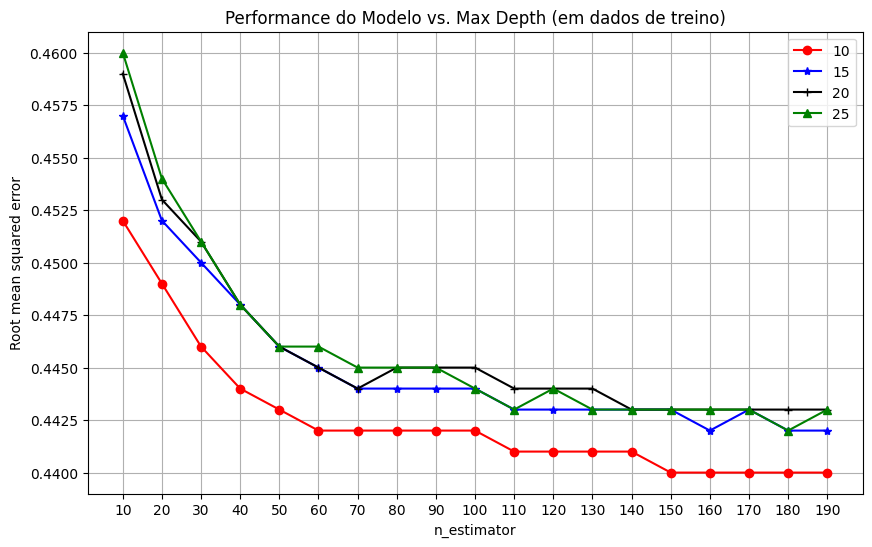

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(df_d.index, df_d["max_depth=10"], marker='o', linestyle='-', color = 'red', label = '10')
plt.plot(df_d.index, df_d["max_depth=15"], marker='*', linestyle='-', color = 'blue', label = '15')
plt.plot(df_d.index, df_d["max_depth=20"], marker='+', linestyle='-', color = 'black', label = '20')
plt.plot(df_d.index, df_d["max_depth=25"], marker='^', linestyle='-', color = 'green', label = '25')
plt.legend()
plt.title('Performance do Modelo vs. Max Depth (em dados de treino)')
plt.xlabel('n_estimator')
plt.ylabel('Root mean squared error')
plt.xticks(estimators)
plt.grid(True)

plt.show()

# Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorithm, it finds the best split. 
When doing it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field. 

For this homework question, we'll find the most important feature:

* Train the model with these parameters:
  * `n_estimators=10`,
  * `max_depth=20`,
  * `random_state=1`,
  * `n_jobs=-1` (optional)
* Get the feature importance information from this model


What's the most important feature (among these 4)? 

* `vehicle_weight`
*	`horsepower`
* `acceleration`
* `engine_displacement`	

In [17]:
rfr = RandomForestRegressor(n_estimators=10, max_depth=20,random_state=1,n_jobs=-1)
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_val)
score = round(rmse(y_val,y_pred),3)
print(f'Score: {score}')

rfr.feature_importances_

Score: 0.459


array([1.14707165e-02, 3.81809750e-04, 3.11842085e-04, 3.26932342e-03,
       3.43693411e-04, 3.36671988e-04, 1.60402148e-02, 3.18229841e-03,
       2.35867094e-03, 1.59113306e-03, 4.76103046e-04, 5.20358083e-04,
       5.55151959e-04, 9.59162013e-01])

In [37]:
feature_dict = {}
for i,j in zip(feature_names,rfr.feature_importances_):
    feature_dict[i] = j

print(feature_dict)

{'acceleration': np.float64(0.011470716492980806), 'drivetrain=All-wheel drive': np.float64(0.0003818097503064216), 'drivetrain=Front-wheel drive': np.float64(0.0003118420847931972), 'engine_displacement': np.float64(0.003269323417164296), 'fuel_type=Diesel': np.float64(0.0003436934113118486), 'fuel_type=Gasoline': np.float64(0.0003366719883675566), 'horsepower': np.float64(0.016040214819390435), 'model_year': np.float64(0.003182298414589243), 'num_cylinders': np.float64(0.002358670936092339), 'num_doors': np.float64(0.0015911330645071602), 'origin=Asia': np.float64(0.0004761030460744537), 'origin=Europe': np.float64(0.0005203580827405701), 'origin=USA': np.float64(0.0005551519590829983), 'vehicle_weight': np.float64(0.9591620125325987)}


In [42]:
pd.DataFrame([feature_dict]).T

,0
acceleration,0.011471
drivetrain=All-wheel drive,0.000382
drivetrain=Front-wheel drive,0.000312
engine_displacement,0.003269
fuel_type=Diesel,0.000344
fuel_type=Gasoline,0.000337
horsepower,0.016040
model_year,0.003182
num_cylinders,0.002359
num_doors,0.001591


In [18]:
train_dict[0]

{'engine_displacement': 120,
 'num_cylinders': 5.0,
 'horsepower': 169.0,
 'vehicle_weight': 2966.67950463456,
 'acceleration': 13.9,
 'model_year': 2005,
 'origin': 'USA',
 'fuel_type': 'Gasoline',
 'drivetrain': 'Front-wheel drive',
 'num_doors': -1.0}

## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` from `0.3` to `0.1`.

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* Both give equal value

## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2025/homework/hw06
* If your answer doesn't match options exactly, select the closest one. If the answer is exactly in between two options, select the higher value.